# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [51]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [54]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data 

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

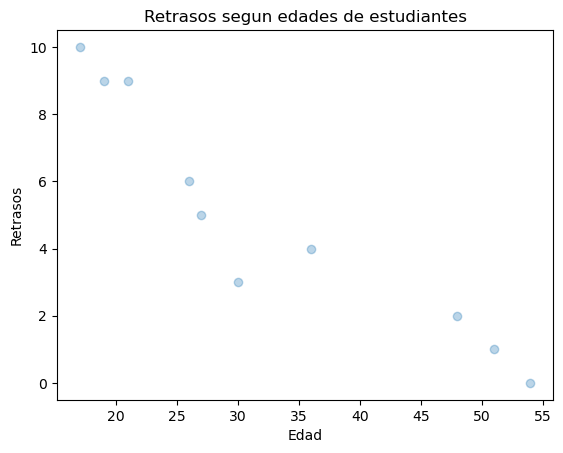

In [57]:
X = student_data['Edad']
y = student_data['Retrasos']

plt.plot(X, y, "o", alpha=0.3)
plt.title('Retrasos segun edades de estudiantes')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

In [60]:
#Si, a medida que son mas grandes, menos retrasos tiene los alumnos

*tu explicación aquí*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [64]:
# Calcular la covarianza
covarianza = student_data['Edad'].cov(student_data['Retrasos'])
print(f'Covarianza entre Edad y Retrasos: {covarianza}')
# Calcular la correlación
correlacion = student_data['Edad'].corr(student_data['Retrasos'])
print(f'Correlación entre Edad e Retrasos: {correlacion}')

# La covarianza mide cómo dos variables cambian juntas. Un valor positivo indica que a medida que una variable aumenta, la otra también tiende a aumentar; un valor negativo indica lo contrario.
# La correlación, en cambio, mide la fuerza y la dirección de la relación lineal entre dos variables. Varía entre -1 y 1. Un valor cercano a 1 indica una fuerte relación positiva, mientras que un valor cercano a -1 indica una fuerte relación negativa. Un valor cercano a 0 indica poca o ninguna relación lineal.
# En este caso podemos observar que la relacion entre la Edad y los Retrasos es inversamente proporcional, es decir, a medida que aumenta a edad, bajan los retrasos; y a medida que disminuye la edad, aumentan los retrasos.


Covarianza entre Edad y Retrasos: -45.56666666666666
Correlación entre Edad e Retrasos: -0.9391626886887122


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [67]:
X = student_data['Edad']
y = student_data['Retrasos']

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

C:\Users\Flor Guindo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Retrasos   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           5.57e-05
Time:                        09:03:35   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Edad          -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

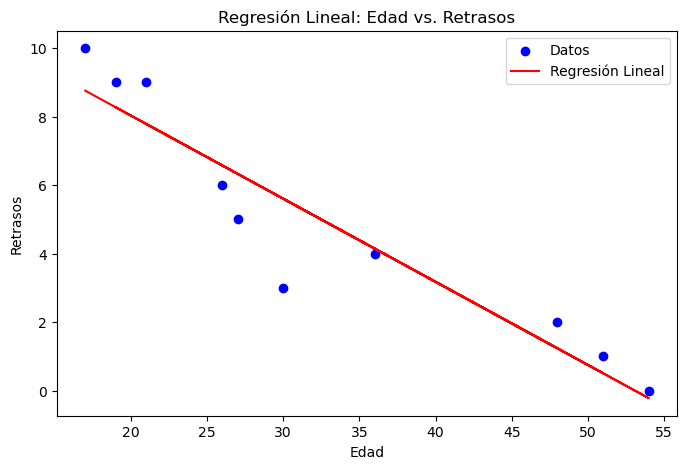

In [71]:
predicciones = model.predict(X)
plt.figure(figsize=(8, 5))
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', label='Datos')
plt.plot(student_data['Edad'], predicciones, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal: Edad vs. Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.show()

Grafica tu modelo de regresión en tu diagrama de dispersión.

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.



Segun lo que se puede observar, la edad es un buen predictor de la tardanza, ya que su P>|t| es igual a 0 y tiene un R-squared igual a 0.882.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [19]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\Flor Guindo\Documents\CURSO DATA ANALYTICS\vehicles.csv")
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [21]:
vehicles_limpio = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles_limpio


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


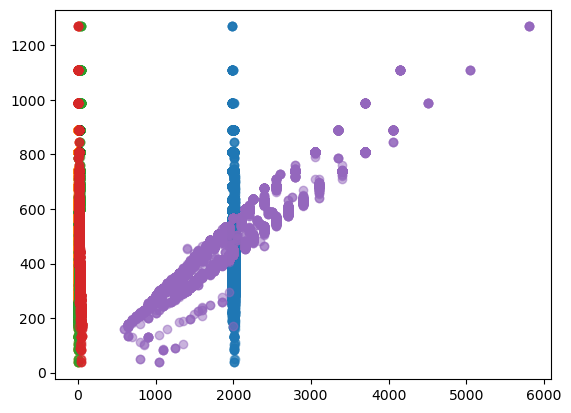

In [22]:
# Your code goes here
X = vehicles_limpio[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles_limpio[['CO2 Emission Grams/Mile']]

plt.plot(X, y, "o", alpha=.5)

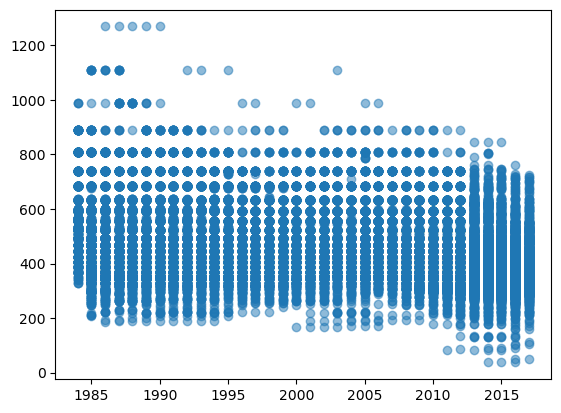

In [23]:
# Your code goes here
X1 = vehicles_limpio[['Year']]
y1 = vehicles_limpio[['CO2 Emission Grams/Mile']]

plt.plot(X1, y1, "o", alpha=.5)

In [24]:
correlacion1 = vehicles_limpio['Year'].corr(vehicles_limpio['CO2 Emission Grams/Mile'])
print(f'Correlación entre Años y Emisiones de CO2 Gramos/Milla: {correlacion1}')
print('--------------------------------------------------------------------------------')
correlacion2 = vehicles_limpio['Cylinders'].corr(vehicles_limpio['CO2 Emission Grams/Mile'])
print(f'Correlación entre Cilindros y Emisiones de CO2 Gramos/Milla: {correlacion2}')
print('--------------------------------------------------------------------------------')
correlacion3 = vehicles_limpio['Fuel Barrels/Year'].corr(vehicles_limpio['CO2 Emission Grams/Mile'])
print(f'Correlación entre Barriles de Combustible/Año y Emisiones de CO2 Gramos/Milla: {correlacion3}')
print('--------------------------------------------------------------------------------')
correlacion4 = vehicles_limpio['Combined MPG'].corr(vehicles_limpio['CO2 Emission Grams/Mile'])
print(f'Correlación entre MPG Combinado y Emisiones de CO2 Gramos/Milla: {correlacion4}')
print('--------------------------------------------------------------------------------')
correlacion5 = vehicles_limpio['Fuel Cost/Year'].corr(vehicles_limpio['CO2 Emission Grams/Mile'])
print(f'Correlación entre Costo de Combustible/Año y Emisiones de CO2 Gramos/Milla: {correlacion5}')
print('--------------------------------------------------------------------------------')

# La variable mas determinante es la de Barriles de Combustible/Año
# Por otro lado de la menor relacion es la de Años.

Correlación entre Años y Emisiones de CO2 Gramos/Milla: -0.22229960295054219
--------------------------------------------------------------------------------
Correlación entre Cilindros y Emisiones de CO2 Gramos/Milla: 0.7523925537297493
--------------------------------------------------------------------------------
Correlación entre Barriles de Combustible/Año y Emisiones de CO2 Gramos/Milla: 0.9861886621428726
--------------------------------------------------------------------------------
Correlación entre MPG Combinado y Emisiones de CO2 Gramos/Milla: -0.926229038933643
--------------------------------------------------------------------------------
Correlación entre Costo de Combustible/Año y Emisiones de CO2 Gramos/Milla: 0.9308651512201841
--------------------------------------------------------------------------------


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [26]:
from sklearn.model_selection import train_test_split

X = sm.add_constant(X)
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(35952, 6) (28761, 6) (7191, 6)
(35952, 1) (28761, 1) (7191, 1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 6) (7191, 6) (28761, 1) (7191, 1)


In [33]:
import statsmodels.api as sm

est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 2.770e+05
Date:                     Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                             08:59:14   Log-Likelihood:            -1.2237e+05
No. Observations:                    28761   AIC:                         2.448e+05
Df Residuals:                        28755   BIC:                         2.448e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               820.7265     22.377     36.676      0.000     776.866     864.587
Year                 -0.3416      0.011    -30.522      0.000      -0.364      -0.320
Cylinders             1.9215      0.096     20.005      0.000       1.733       2.110
Fuel Barrels/Year    18.5212      0.070    265.745      0.000      18.385      18.658
Combined MPG         -3.2568      0.049    -66.390      0.000      -3.353      -3.161
Fuel Cost/Year        0.0348      0.001     62.703      0.000       0.034       0.036
==============================================================================
Omnibus:                    55037.228   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        156136169.262
Skew:                          14.823   Prob(JB):                         0.00
Kurtosis:                     362.737   Cond. No.                     6.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [174]:
# El modelo que utilice es OLS. 
# Las variables mas importantes de mi modelo son Fuel Barrels/Year y Combined MPG, ya que son aquellas que poseen un coefeciente mayor. Por lo que influyen mas en el resaultado.
# Como conclusion se podria decir que (ordenados en orden de influencia descendente):
# A mayor Barriles de Combustible/Año, mayor cantidad Emisiones de CO2 Gramos/Milla
# A menor MPG combinados, mayor cantidad de Emisiones de CO2 Gramos/Milla
# A mayor cantidad de Cilindros, mayor cantidad de Emisiones de CO2 Gramos/Milla
# A menor antiguedad del vehiculo, menor cantidad de Emisiones de CO2 Gramos/Milla


## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [89]:
fiestas = {
    'Invitaciones': [1, 3, 4, 6, 8, 9, 11, 14],
    'Asistencias': [1, 2, 4, 4, 5, 7, 8, 13]
}
df_fiestas = pd.DataFrame(fiestas)
display(df_fiestas)

,Invitaciones,Asistencias
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

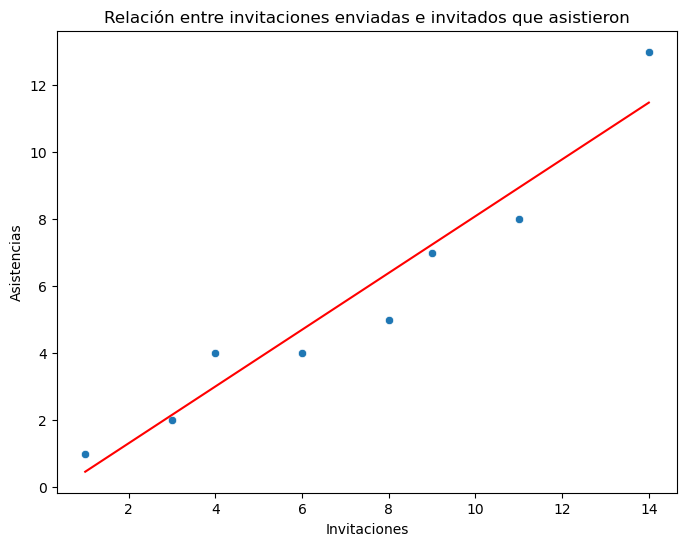

In [105]:
X = df_fiestas[['Invitaciones']]
y = df_fiestas['Asistencias']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Invitaciones', y='Asistencias', data=df_fiestas)
plt.plot(x_range, y_line, 'r')
plt.xlabel("Invitaciones")
plt.ylabel("Asistencias")
plt.title("Relación entre invitaciones enviadas e invitados que asistieron")
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

Indica una relación directamente proporcional entre la cantidad de invitaciones enviadas y los que finalmente asistieron a la fiesta. La tendencia tiene gran coincidencia con la linea de regresion.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

No considero que haya valores atipicos para limpiar.